In [1]:
import loans
import search
import math
from collections import defaultdict
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# lcu = loans.Bank("Landmark Credit Union")

In [3]:
# lcu[-1]

In [4]:
# len(lcu)

In [5]:
#Q1: What is the average interest rate for the bank?
avg_interest_list = []
not_want = [-1]

merchantbankindia = loans.Bank("Merchants Bank of Indiana")
# merchantbankindiabst = loans.BST("Merchants Bank of Indiana")
for i in merchantbankindia:
    rate = i.interest_rate
    # print(i.interest_rate)
    if rate not in not_want:
        avg_interest_list.append(rate)

avg_interest = sum(avg_interest_list)/len(avg_interest_list)
avg_interest
#merchantbankindia[1].interest_rate

3.2181818181818183

In [6]:
#Q2 How many applicants are there per loan, on average?
app_count = []
for i in merchantbankindia:
    # print(len(i.applicants))
    nums = i.applicants
    nums2 = len(nums)
    app_count.append(nums2)
    
sum(app_count)/len(app_count)

1.6724137931034482

In [7]:
#Q3 What is the distribution of ages?
ages = []
ages_dict = {}
for i in merchantbankindia:
    applicants = i.applicants
    ages.append(applicants)
# ages
age_count = defaultdict(int)

for group in ages:
    for applicant in group:
        age_count[applicant.age] += 1

dict(age_count)
    

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

In [8]:
#Q4 How many interest rate values are missing?
treelist = []
for i in merchantbankindia:
    applicants = i.interest_rate
    treelist.append(applicants)
    
# treelist


tree = search.BST()
for nums in treelist:
    tree.add(nums)
    
# tree.dump()

# missing = tree.root.lookup_key(-1.0)
missing = tree.root.lookup(-1.0)
sum(missing)

3

In [9]:
#Q5 How tall is the tree?
def height(node):
    if node is None:
        return -1
    left = height(node.left)
    right = height(node.right)
    return 1 + max(left, right)

tree = search.BST()
treelist = []
for i in merchantbankindia:
    applicants = i.interest_rate
    treelist.append(applicants)
    
for nums in treelist:
    tree.add(nums)

# tree.dump()
height = height(tree.root)
height

8

In [10]:
lcu = loans.Bank("Landmark Credit Union")
lcu_tree = search.BST()

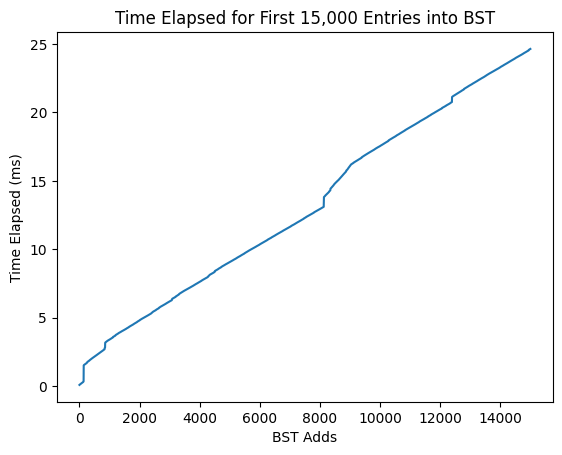

In [11]:
#Q6 How long does it take to add the first 15,000 loans to the tree?
lcu_loans = []

for i in lcu:
    loan = i.loan_amount
    lcu_loans.append(loan)
    
lcu_loans = lcu_loans[0:15000]

totaltime = []
starttime = time.time()
for i in lcu_loans:
   
    lcu_tree.add(i, i)
    endtime = time.time()
    totaltime.append((endtime - starttime) * 1000)
    


# plot1 = pd.Series(dtype=float)
# for i in lcu_loans:
#     starttime = time.time()
#     lcu_tree.add(i)
#     endtime = time.time()
#     plot1[i] = (endtime - starttime) * 1000
    
plt.plot(totaltime)
plt.title("Time Elapsed for First 15,000 Entries into BST")
plt.xlabel("BST Adds")
plt.ylabel("Time Elapsed (ms)")
plt.show()


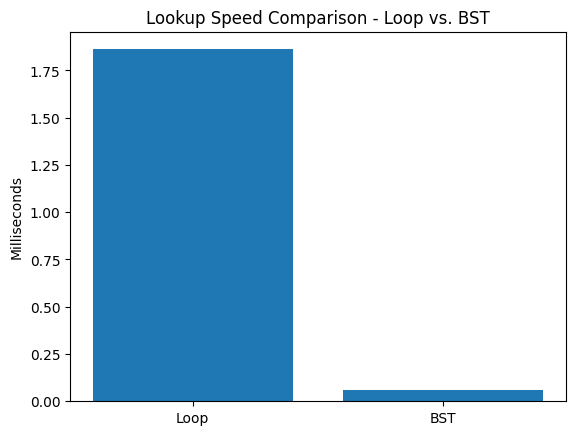

In [12]:
#Q7 How fast are tree lookups?
rate_199 = []

for i in lcu:
    interest_rate = i.interest_rate
    rate_199.append(interest_rate)

lcuratetree = search.BST()
for nums in rate_199:
    lcuratetree.add(nums)
    
count = 0    
starttime1 = time.time()
for rate in rate_199: 
    if rate == 1.99:
        count += 1
endtime1 = time.time()
totaltime1 = (endtime1 - starttime1) * 1000 

starttime2 = time.time()
# len199 = len(lcuratetree.root.lookup_key(1.99)) 
len199 = len(lcuratetree.root.lookup(1.99)) 
endtime2 = time.time()
totaltime2 = (endtime2 - starttime2) * 1000 

methods = ['Loop', 'BST']
times = [totaltime1, totaltime2]

plt.bar(methods, times)
plt.ylabel('Milliseconds')
plt.title('Lookup Speed Comparison - Loop vs. BST')
plt.show()  

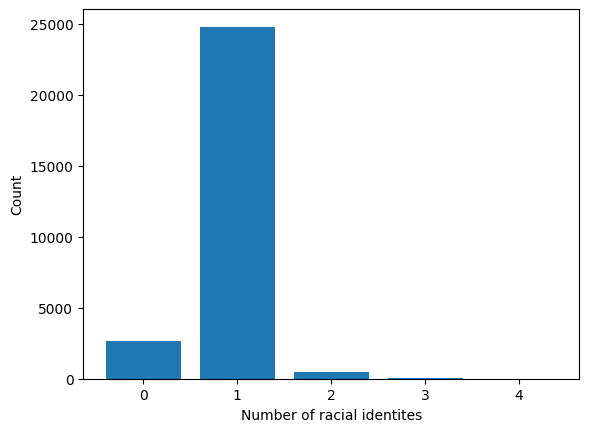

In [13]:
#Q8 What is the distribution of amount of racial identities across all applicants?
races = []
for i in lcu:
    race = i.applicants
    races.append(race)

race_count = defaultdict(int)

# races

for group in races:
    for applicant in group:
        r_id = len(applicant.race)
        # for race in applicant.race:
        race_count[r_id] += 1
        
# for group in ages:
#     for applicant in group:
#         num_races = len(applicant.race)  # Count the number of races the applicant identifies with
#         race_count[num_races] += 1        
        
race_count_dict = dict(race_count)
race_count_dict = dict(sorted(race_count_dict.items()))

races = race_count_dict.keys()
count = race_count_dict.values()

plt.bar(races, count)
plt.xlabel("Number of racial identites")
plt.ylabel("Count")
plt.show()

In [14]:
#Q9 How many leaf nodes are in the tree?

# races = []
# for i in lcu:
#     race = i.applicants
#     races.append(race)
# for group in races:
#     for applicant in group:
#         r_id = len(applicant.race)
#         # for race in applicant.race:
#         r_id = len(applicant.race)
#         race_bst.add(r_id)
        
def leaf_count(node):
    if node is None:
        return 0

    if node.left is None and node.right is None:
        return 1

    return leaf_count(node.left) + leaf_count(node.right)


leaf_counts = leaf_count(lcuratetree.root)
leaf_counts

63

In [15]:
#Q10 What is the third largest interest rate in the Bank BST?
interest_rate_sorted = rate_199
interest_rate_sorted_nodupes = sorted(list(set(interest_rate_sorted)), reverse = True)

def interest_rate_top_3(top, n, result = None):
    if result == None:
        result = []
        
    if len(result) == n or not top:
        return result
    
    max_value = max(top)
    result.append(max_value)
    
    top.remove(max_value)
    return interest_rate_top_3(top, n, result)

interest_rate_top_3(interest_rate_sorted_nodupes, 3)[-1]
# interest_rate_sorted
# interest_rate_sorted_nodupes

9.85